<a href="https://colab.research.google.com/github/gerazayisti/tensorFlow/blob/main/Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install larq

In [ ]:
import tensorflow as tf
import larq as lq
import pandas as pd
import seaborn as sea
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
import numpy as np

# **Preparation des données**

In [ ]:
donnee = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/processed_data.csv",",")
donnee.head()

<ipython-input-524-4f6d97d5e1af>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  donnee = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/processed_data.csv",",")


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,Y_encoded
0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1
1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1
2,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,15
3,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,6
4,0,1,0,1,0,1,0,1,1,1,1,1,0,0,0,1,0,1,5


**verification de l'etendu des donnees**

In [ ]:
donnee.shape

(100, 19)

In [ ]:
entree = donnee[['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x7', 'x8','x9','x10','x11','x12', 'x13', 'x14', 'x15', 'x16','x17', 'x18','Y_encoded']]
#sea.pairplot(entree, diag_kind ='hist')

In [ ]:
entree.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,Y_encoded
0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1
1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1
2,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,15
3,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,6
4,0,1,0,1,0,1,0,1,1,1,1,1,0,0,0,1,0,1,5


In [ ]:
entree.shape

(100, 19)

conversion de nos données en tenseur et mellons les donnees avant entrainement

In [ ]:
tenseur_donnee = tf.constant(entree)
tenseur_donnee = tf.cast(tenseur_donnee, tf.float32)
print(tenseur_donnee)

tf.Tensor(
[[ 0.  0.  0. ...  0.  1.  1.]
 [ 1.  0.  1. ...  0.  1.  1.]
 [ 0.  1.  0. ...  0.  1. 15.]
 ...
 [ 0.  1.  1. ...  0.  1.  7.]
 [ 0.  0.  1. ...  0.  1.  7.]
 [ 1.  0.  1. ...  0.  1.  4.]], shape=(100, 19), dtype=float32)


In [ ]:
tenseur_donnee = tf.random.shuffle(tenseur_donnee)
X = tenseur_donnee[:,]
Y = tenseur_donnee[:,18]
Y = tf.expand_dims(Y, axis = -1)
print(X.shape, Y.shape)
print(X[:5], Y[:5])

(100, 19) (100, 1)
tf.Tensor(
[[ 1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.
   8.]
 [ 0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.
   3.]
 [ 0.  0.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.
   3.]
 [ 0.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.
   1.]
 [ 1.  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.
  11.]], shape=(5, 19), dtype=float32) tf.Tensor(
[[ 8.]
 [ 3.]
 [ 3.]
 [ 1.]
 [11.]], shape=(5, 1), dtype=float32)


*division des données (donnee entrainenement 80%, donnee de validation 10%, donnee de test 10%)* ET ATTRIBUTION DE NOUVEAU JEUX DE DONNEE

In [ ]:
TRAIN_RATIO = 0.8
VALID_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

verifions nos jeux de donnees

In [ ]:
X_train= X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train= Y[:int(DATASET_SIZE*TRAIN_RATIO)]

X_valid= X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VALID_RATIO+TRAIN_RATIO))]
y_valid= Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VALID_RATIO+TRAIN_RATIO))]

X_test= X[int(DATASET_SIZE*(VALID_RATIO+TRAIN_RATIO)):]
y_test= Y[int(DATASET_SIZE*(VALID_RATIO+TRAIN_RATIO)):]

print('DONNEES D\'ENTRAINEMENT D\'ENTREE= ',X_train.shape)
print('DONNEE D\'ENTRAINEMENT DE SORTIE=',y_train.shape)

print('DONNEE DE VALIDATION D\'ENTREE=',X_valid.shape)
print('DONNEE DE VALIDATION DE SORTIE=',y_valid.shape)

print('DONNEE DE TEST D\'ENTREE=',X_test.shape)
print('DONNEE DE TEST DE SORTIE=',y_test.shape)

DONNEES D'ENTRAINEMENT D'ENTREE=  (80, 19)
DONNEE D'ENTRAINEMENT DE SORTIE= (80, 1)
DONNEE DE VALIDATION D'ENTREE= (10, 19)
DONNEE DE VALIDATION DE SORTIE= (10, 1)
DONNEE DE TEST D'ENTREE= (10, 19)
DONNEE DE TEST DE SORTIE= (10, 1)


configuration et reglage des overflows

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 19, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
valid_dataset = valid_dataset.shuffle(buffer_size = 19, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 19, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

normalisation

In [ ]:
normalisation_x = Normalization()
normalisation_x.adapt(X_train)
normalisation_x(X_train)

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(19,)),
    normalisation_x,
    lq.layers.QuantDense(82, activation='relu'),
    lq.layers.QuantDense(82, activation='relu'),
    lq.layers.QuantDense(82, activation='relu'),
    lq.layers.QuantDense(82, activation='relu'),
    lq.layers.QuantDense(82, activation='relu'),
    lq.layers.QuantDense(82, activation='relu'),
    lq.layers.QuantDense(1),
])

model_1.summary()

In [ ]:
#tf.keras.utils.plot_model(model_1, to_file ="Regression_L(82).png", show_shapes=True)

In [ ]:
model_1.compile( optimizer = Adam(learning_rate = 0.01),
               loss = MeanAbsoluteError(),
               metrics = RootMeanSquaredError() )
history = model_1.fit(train_dataset, validation_data=valid_dataset, epochs = 100, verbose = 1)

In [ ]:
loss, accuracy = model_1.evaluate(X_test, y_test)

print(f'Loss: {loss}, Accuracy: {round(accuracy*100,2)}%')

1/1 [==============================] - 0s 45ms/step - loss: 0.6676 - root_mean_squared_error: 0.8624
Loss: 0.6675943732261658, Accuracy: 86.24%


In [564]:
y_pred= list(model_1.predict(X_test)[:,0])
y_true = list(y_test[:,0].numpy())
print(y_pred)
print(y_true)

1/1 [==============================] - 0s 296ms/step
[3.2421443, 8.16425, 10.7551365, 4.555846, 2.3845484, 14.197264, 14.2174, 11.31915, 13.664086, 13.332084]
[3.0, 8.0, 9.0, 4.0, 4.0, 15.0, 14.0, 11.0, 14.0, 14.0]


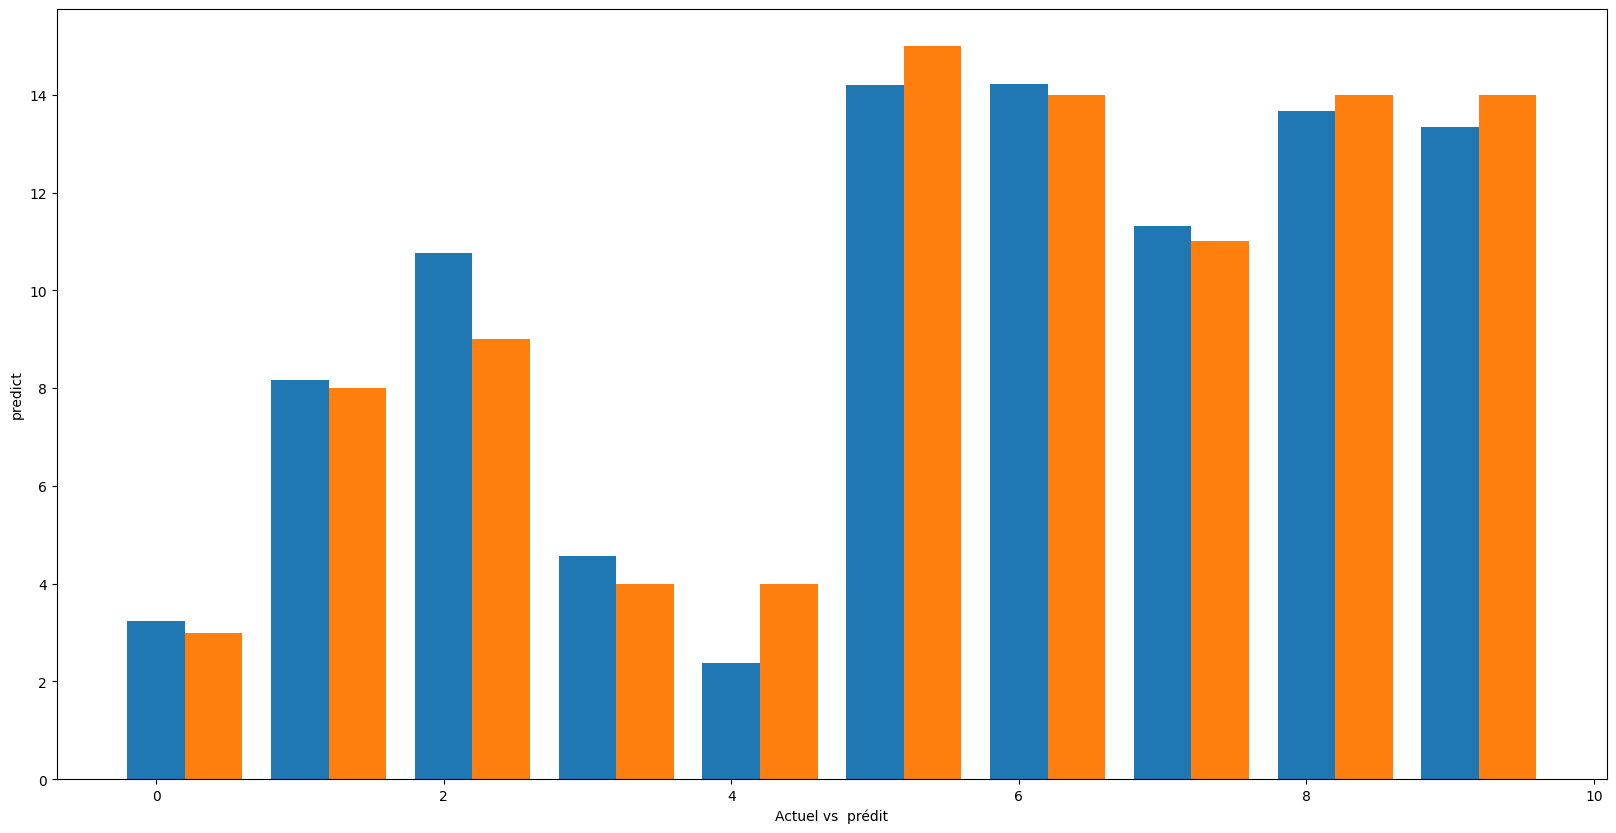

In [572]:
ind = np.arange(10)
plt.figure(figsize = (20, 10))

width = 0.4

plt.bar(ind,
        y_pred,
        width,
        label='prediction du model')
plt.bar(ind + width, y_true, width, label='valeur actuel')

plt.xlabel('Actuel vs  prédit')
plt.ylabel('predict')

plt.show()